In [1]:
#import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

In [2]:
#read the csv file
df = pd.read_csv('data-HW2.csv')
#preview the first 5 rows
df.head()

,date,RefSt,Sensor_MLR_O3,Sensor_SVR_O3
0,10/05/2017 00:00,72.0,78.51,70.37
1,10/05/2017 01:00,60.0,66.49,59.77
2,10/05/2017 02:00,62.0,54.47,49.16
3,10/05/2017 03:00,87.0,71.58,65.94
4,10/05/2017 04:00,72.0,74.07,67.78


In [3]:
#covert the data to datatime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')
#set the date as index
df.set_index('date', inplace=True)
#gruop the data by day
dayGrup = df.groupby(df.index.date)
#print how many days are in the data
print('Number of days in the data: ', len(dayGrup))

Number of days in the data:  127


In [4]:
#defining the function to compute denoising
def dfToMatrix(df):
    matrix = np.zeros(shape=(24,len(completeDays)))
    i =0
    for _, group in completeDays:
        matrix[:,i] = group[df]
        i+=1
    return matrix

def dfToMatrixALL(df):
    matrix = np.zeros(shape=(24,len(dayGrup)))
    i =0
    for _, group in dayGrup:
        try:
            matrix[:,i] = group[df]
        except:
            matrix[:,i] = np.nan
        i+=1
    return matrix
def remove_nan(matrice, matrice2):
    valori_senza_nan = []
    valori2_senza_nan= []

    # Ottieni il numero di righe e colonne nella matrice
    num_righe = 24
    num_colonne = len(dayGrup)

    # Scorri le righe
    for i in range(num_righe):
        # Scorri le colonne
        for j in range(num_colonne):
            # Verifica se l'elemento corrente non è np.nan e aggiungilo alla lista
            if not np.isnan(matrice[i][j]):
                valori_senza_nan.append(matrice[i][j])
                valori2_senza_nan.append(matrice2[i][j])

    return valori_senza_nan, valori2_senza_nan

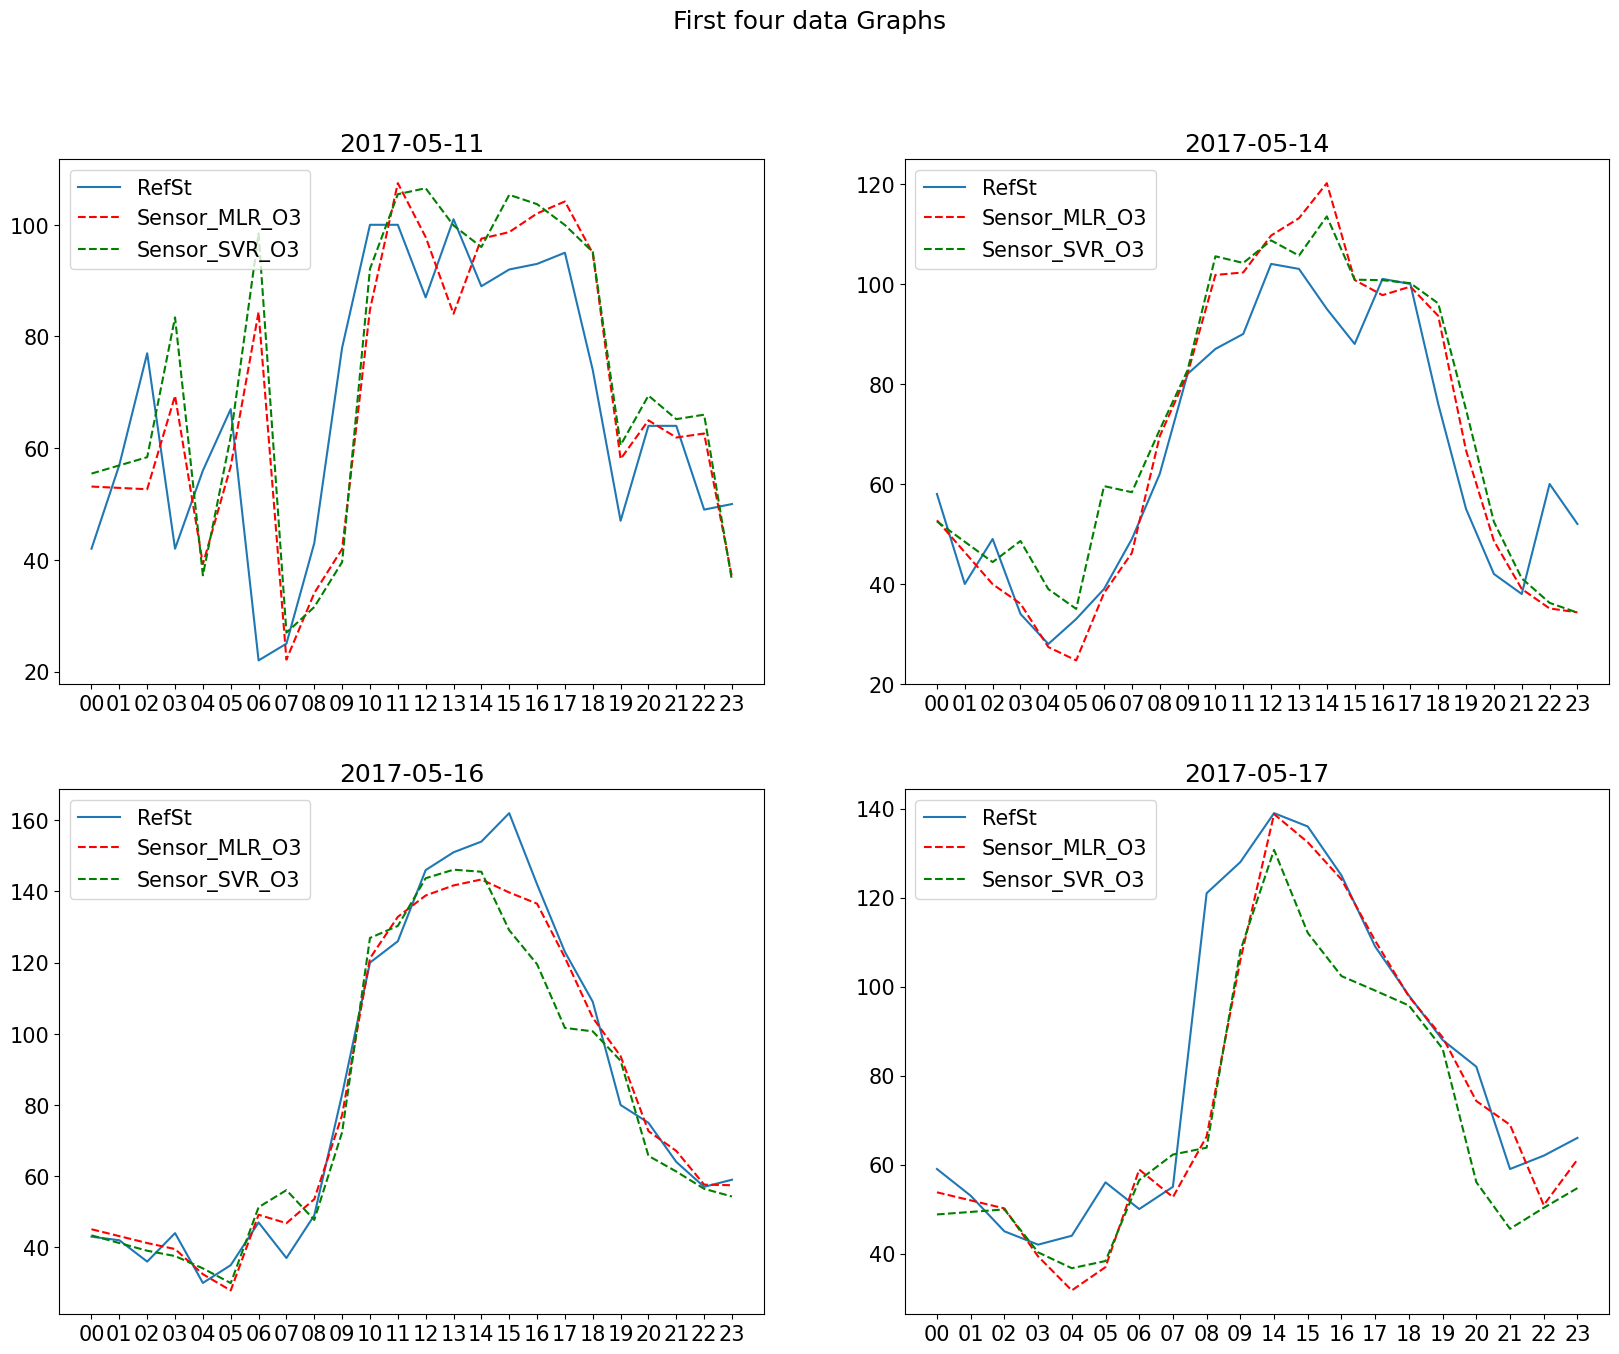

In [5]:
#plot the first four data in 4 subplots
i =-1
fig, axs = plt.subplots(2, 2)

for day, group in dayGrup:

    if i > 3:
        break
    #df.index.time cast to a string
    if i==0 :
        axs[0,0].plot(group.index.strftime("%H"), group['RefSt'])
        axs[0,0].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[0,0].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green') 
        axs[0,0].set_title(day)
        #add legend
        axs[0,0].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3'], loc='upper left')
    elif i==1:
        axs[0,1].plot(group.index.strftime("%H"), group['RefSt'])
        axs[0,1].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[0,1].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green') 
        axs[0,1].set_title(day)
        #add legend
        axs[0,1].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3'], loc='upper left')
    elif i==2:
        axs[1,0].plot(group.index.strftime("%H"), group['RefSt'])
        axs[1,0].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[1,0].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green') 
        axs[1,0].set_title(day)
        #add legend
        axs[1,0].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3'], loc='upper left')
    elif i==3:
        axs[1,1].plot(group.index.strftime("%H"), group['RefSt'])
        axs[1,1].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[1,1].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green')
        axs[1,1].set_title(day)
        #add legend
        axs[1,1].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3'], loc='upper left')
    i+=1

fig.set_figheight(15)
fig.set_figwidth(20)
# Add a title to the figure
fig.suptitle('First four data Graphs')
# font size
plt.rcParams.update({'font.size': 15})


# Display the figure
plt.show()


# of element in data_Reft_toMatrixALL_list_to_MLR:  2496 should be less 24*len(dayGrup):  3048 more than 24*len(completeDays):  2472
# of element in data_Reft_toMatrixALL_list_to_SVR:  2496 should be less 24*len(dayGrup):  3048 more than 24*len(completeDays):  2472


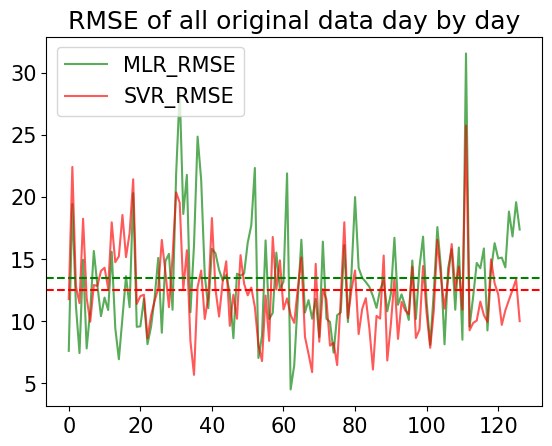

mean_RMSE_MLR_origin:  13.424000047811898
mean_RMSE_SVR_origin:  12.454532376719586


In [6]:
#calculate the RMSE for each day
from sklearn.metrics import mean_squared_error
#make lists of RMSE
RMSE_MLR_origin = []
RMSE_SVR_origin = []
#calculate the RMSE for each day
for day, group in dayGrup:
    RMSE_MLR_origin.append(np.sqrt(mean_squared_error(group['RefSt'], group['Sensor_MLR_O3'])))
    RMSE_SVR_origin.append(np.sqrt(mean_squared_error(group['RefSt'], group['Sensor_SVR_O3'])))


#plot the RMSE
plt.plot(RMSE_MLR_origin, color='green',alpha=0.65, label='MLR_RMSE')
plt.plot(RMSE_SVR_origin,  color='red',alpha=0.65, label='SVR_RMSE')
plt.legend(loc='upper left')
plt.title('RMSE of all original data day by day')

data_Reft_toMatrixALL = dfToMatrixALL('RefSt')
data_MLR_toMatrixALL = dfToMatrixALL('Sensor_MLR_O3')
data_SVR_toMatrixALL = dfToMatrixALL('Sensor_SVR_O3')
#make lists of data MLR without nan
data_Reft_toMatrixALL_list_to_MLR, data_MLR_toMatrixALL_list = remove_nan(data_Reft_toMatrixALL, data_MLR_toMatrixALL)


#calculate the RMSE
mean_RMSE_MLR_origin = mean_squared_error(data_Reft_toMatrixALL_list_to_MLR, data_MLR_toMatrixALL_list, squared=False)
print('# of element in data_Reft_toMatrixALL_list_to_MLR: ', len(data_Reft_toMatrixALL_list_to_MLR), 'should be less 24*len(dayGrup): ', 24*len(dayGrup), 'more than 24*len(completeDays): ', 24*103)
#make lists of data SVR without nan
data_Reft_toMatrixALL_list_to_SVR, data_SVR_toMatrixALL_list = remove_nan(data_Reft_toMatrixALL, data_SVR_toMatrixALL)
print('# of element in data_Reft_toMatrixALL_list_to_SVR: ', len(data_Reft_toMatrixALL_list_to_SVR), 'should be less 24*len(dayGrup): ', 24*len(dayGrup), 'more than 24*len(completeDays): ', 24*103)

#calculate the RMSE
mean_RMSE_SVR_origin = mean_squared_error(data_Reft_toMatrixALL_list_to_SVR, data_SVR_toMatrixALL_list, squared=False)


# Display the mean on the plot
plt.axhline(mean_RMSE_MLR_origin, color='green', linestyle='dashed')
plt.axhline(mean_RMSE_SVR_origin, color='red', linestyle='dashed')

#set the figure size
plt.rcParams["figure.figsize"] = (20,12)

plt.show()

print('mean_RMSE_MLR_origin: ', mean_RMSE_MLR_origin)
print('mean_RMSE_SVR_origin: ', mean_RMSE_SVR_origin)


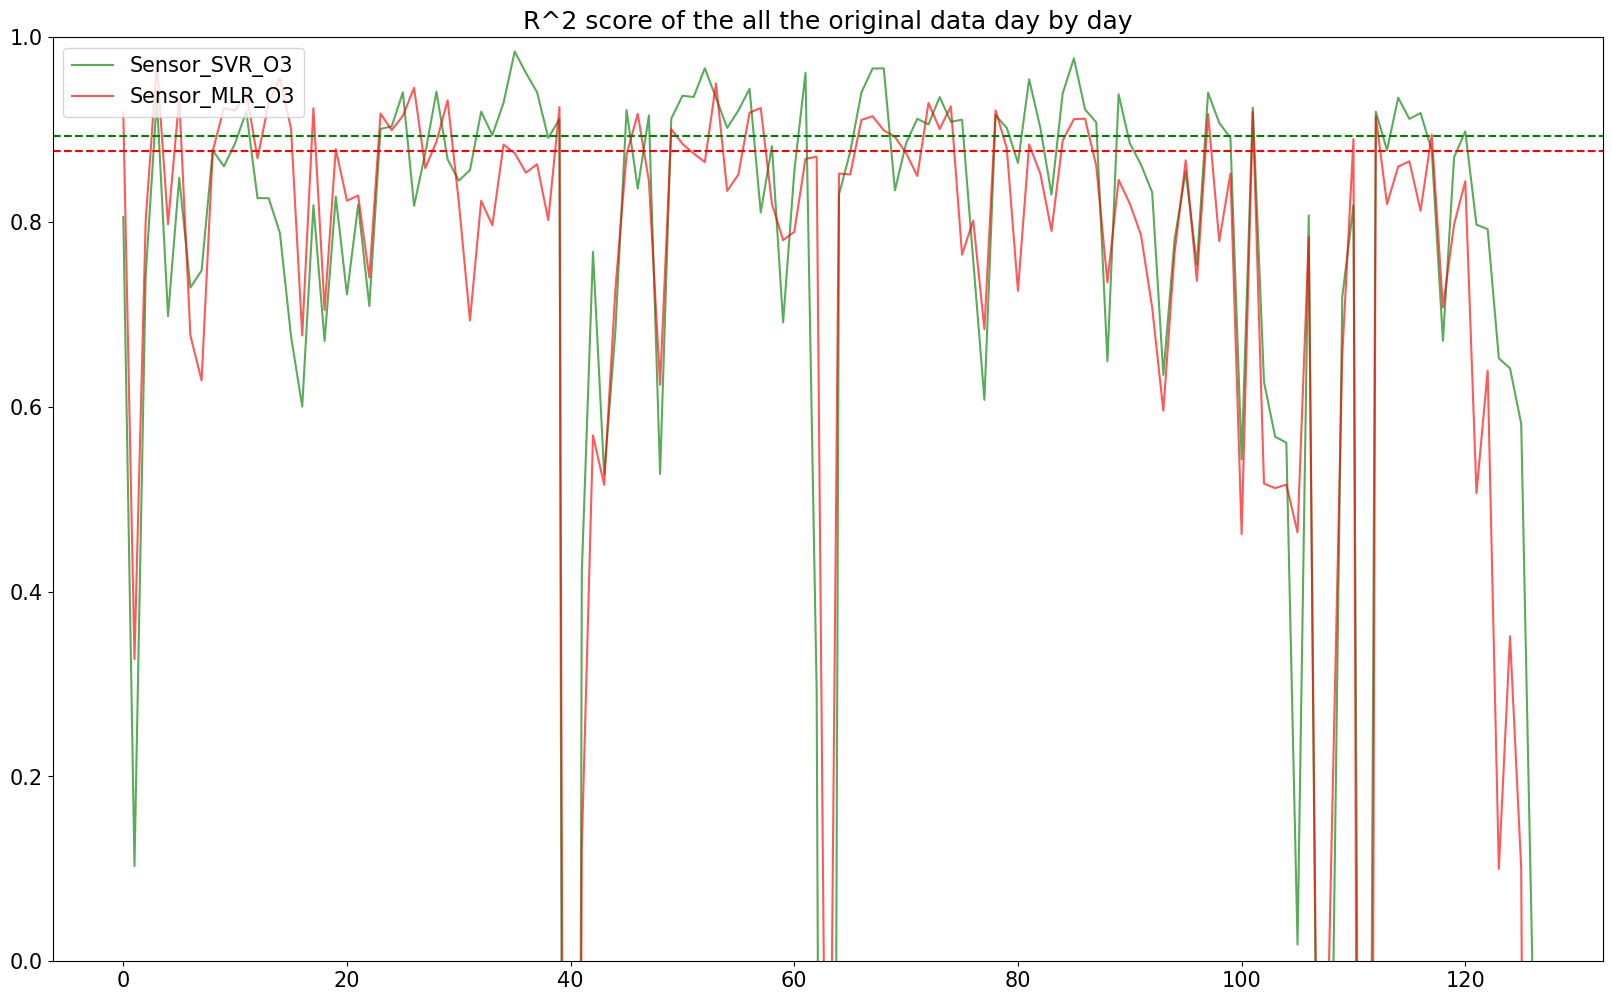

mean of r2_MLR:  0.876435592202958
mean of r2_SVR:  0.8936385243756981


In [7]:
#calcultae r2_score for each day
from sklearn.metrics import r2_score    
r2_MLR = []
r2_SVR = []
#calculate the r2_score for each day
for day, group in dayGrup:
    r2_MLR.append(r2_score(group['RefSt'], group['Sensor_MLR_O3'],force_finite=False))
    r2_SVR.append(r2_score(group['RefSt'], group['Sensor_SVR_O3'],force_finite=False))

#plot the r2_score
plt.plot(r2_SVR, color='green',alpha=0.65)
plt.plot(r2_MLR,  color='red',alpha=0.65)
plt.legend(['Sensor_SVR_O3', 'Sensor_MLR_O3'], loc='upper left')
plt.title('r2_score')
r2_MLR_ALLdata = r2_score(data_Reft_toMatrixALL_list_to_MLR, data_MLR_toMatrixALL_list,force_finite=False)
r2_SVR_ALLdata = r2_score(data_Reft_toMatrixALL_list_to_SVR, data_SVR_toMatrixALL_list,force_finite=False)
# Display the mean on the plot
plt.axhline(r2_MLR_ALLdata, color='red', linestyle='dashed')
plt.axhline(r2_SVR_ALLdata, color='green', linestyle='dashed')
#crop the plot to excludenegative the  values
plt.ylim(bottom=0)
plt.ylim(top=1)
#set title
plt.title('R^2 score of the all the original data day by day')
#set the figure size
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

print('mean of r2_MLR: ', r2_MLR_ALLdata)
print('mean of r2_SVR: ', r2_SVR_ALLdata)


In [8]:
#create a dataframe with the complete days
filtered: pd.DataFrame = dayGrup.filter(lambda x: len(x) == 24)
completeDays: pd.DataFrame = filtered.groupby(filtered.index.date)

#create a dataframe with the incomplete days
filtered_incomplete = pd.DataFrame = dayGrup.filter(lambda x: len(x) != 24)
filtered_incompleteDF: pd.DataFrame = filtered_incomplete.groupby(filtered_incomplete.index.date)

#print the incomplete days
print('not complete days: ', len(dayGrup)-len(completeDays))
for day, group in filtered_incompleteDF:
   print(day)



not complete days:  23
2017-05-17
2017-06-01
2017-06-05
2017-06-16
2017-06-25
2017-06-26
2017-06-29
2017-07-07
2017-07-12
2017-07-16
2017-07-22
2017-07-23
2017-07-25
2017-07-27
2017-08-07
2017-08-16
2017-09-07
2017-09-14
2017-09-15
2017-09-19
2017-09-23
2017-09-30
2017-10-05


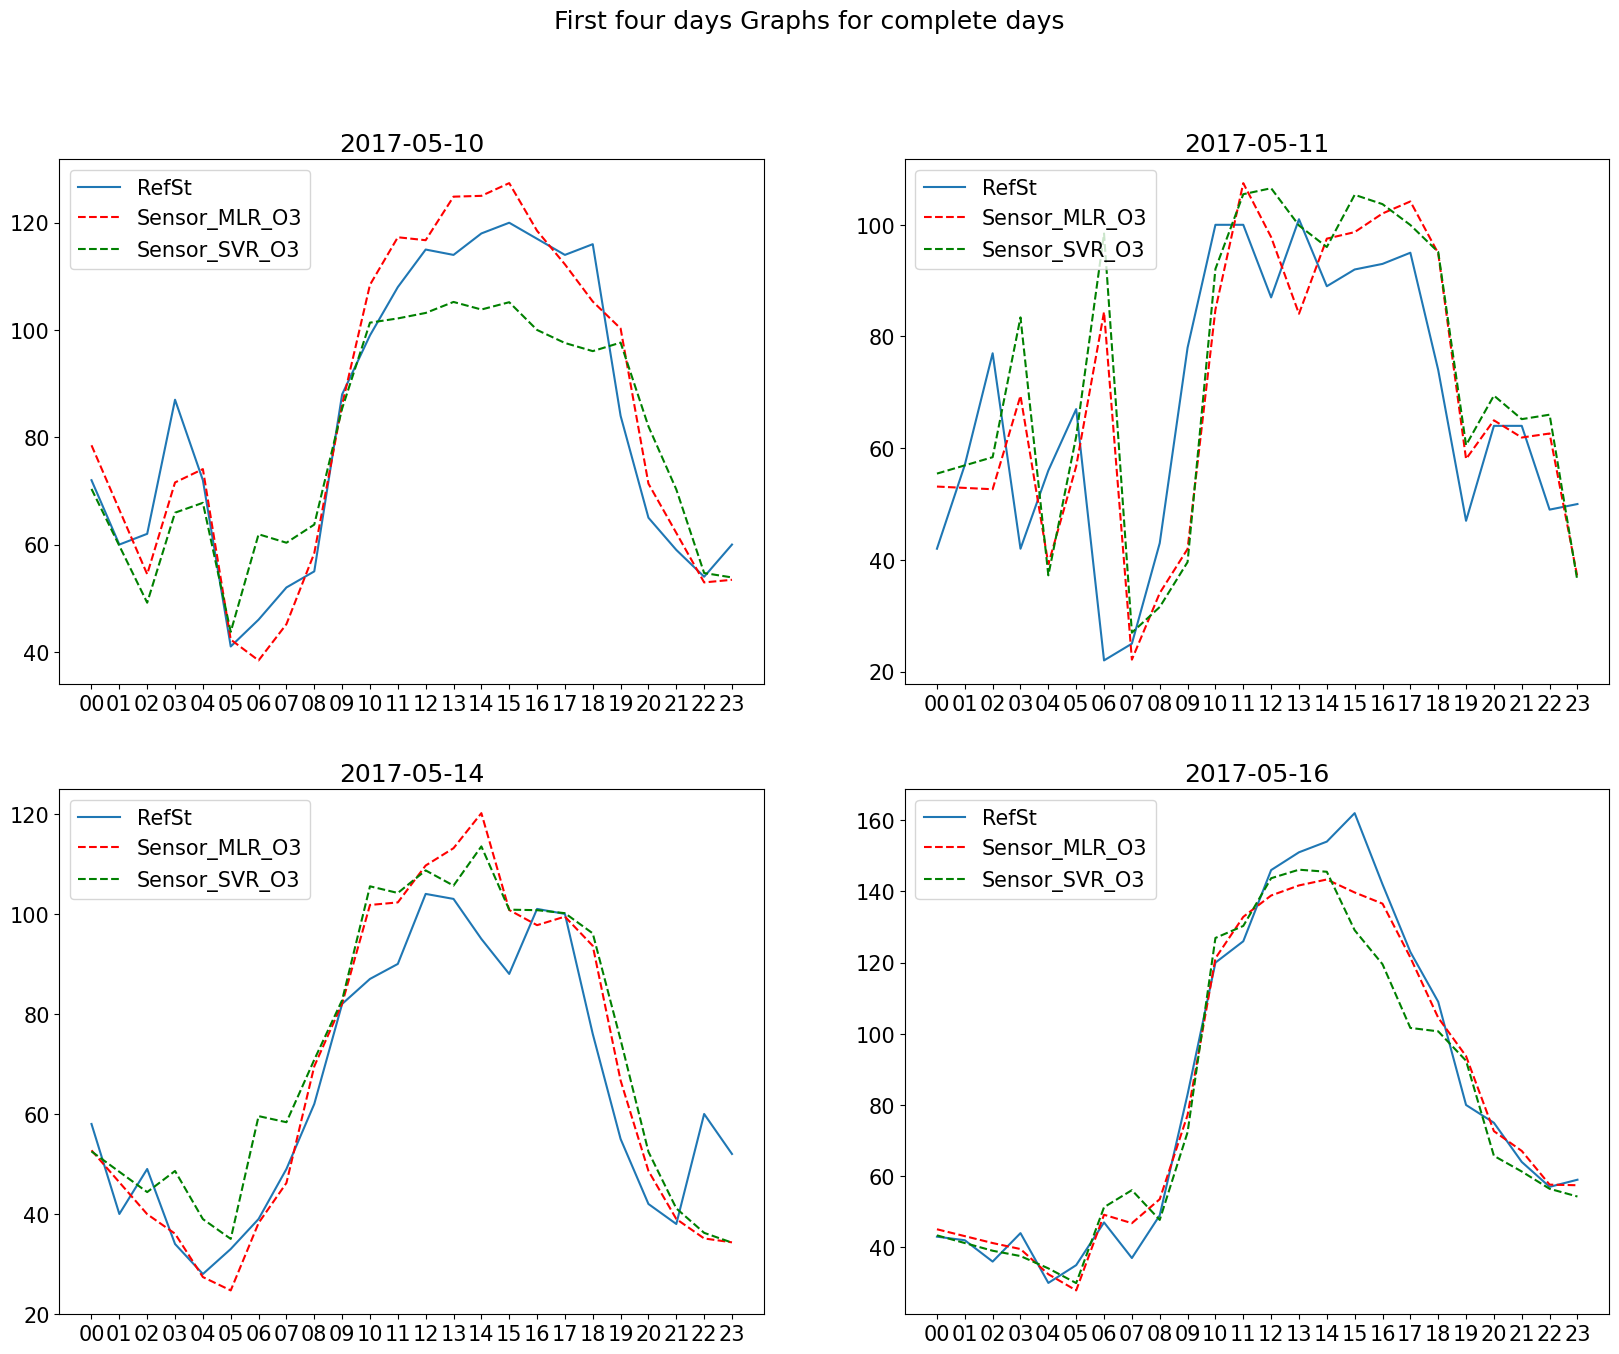

In [9]:
#plot the first four data in 4 subplots
i =0
fig, axs = plt.subplots(2, 2)

for day, group in completeDays:
    if i > 3:
        break
    #df.index.time cast to a string
    if i==0 :
        axs[0,0].plot(group.index.strftime("%H"), group['RefSt'])
        axs[0,0].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[0,0].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green') 
        axs[0,0].set_title(day)
        #add legend
        axs[0,0].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3'], loc='upper left')
    elif i==1:
        axs[0,1].plot(group.index.strftime("%H"), group['RefSt'])
        axs[0,1].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[0,1].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green') 
        axs[0,1].set_title(day)
        #add legend
        axs[0,1].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3'], loc='upper left')
    elif i==2:
        axs[1,0].plot(group.index.strftime("%H"), group['RefSt'])
        axs[1,0].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[1,0].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green') 
        axs[1,0].set_title(day)
        #add legend
        axs[1,0].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3'], loc='upper left')
    elif i==3:
        axs[1,1].plot(group.index.strftime("%H"), group['RefSt'])
        axs[1,1].plot(group.index.strftime("%H"), group['Sensor_MLR_O3'], linestyle='dashed', color='red')
        axs[1,1].plot(group.index.strftime("%H"), group['Sensor_SVR_O3'], linestyle='dashed', color='green')
        axs[1,1].set_title(day)
        #add legend
        axs[1,1].legend(['RefSt', 'Sensor_MLR_O3', 'Sensor_SVR_O3'], loc='upper left')
    i+=1

fig.set_figheight(15)
fig.set_figwidth(20)
# Add a title to the figure
fig.suptitle('First four days Graphs for complete days')
# font size


# Display the figure
plt.show()


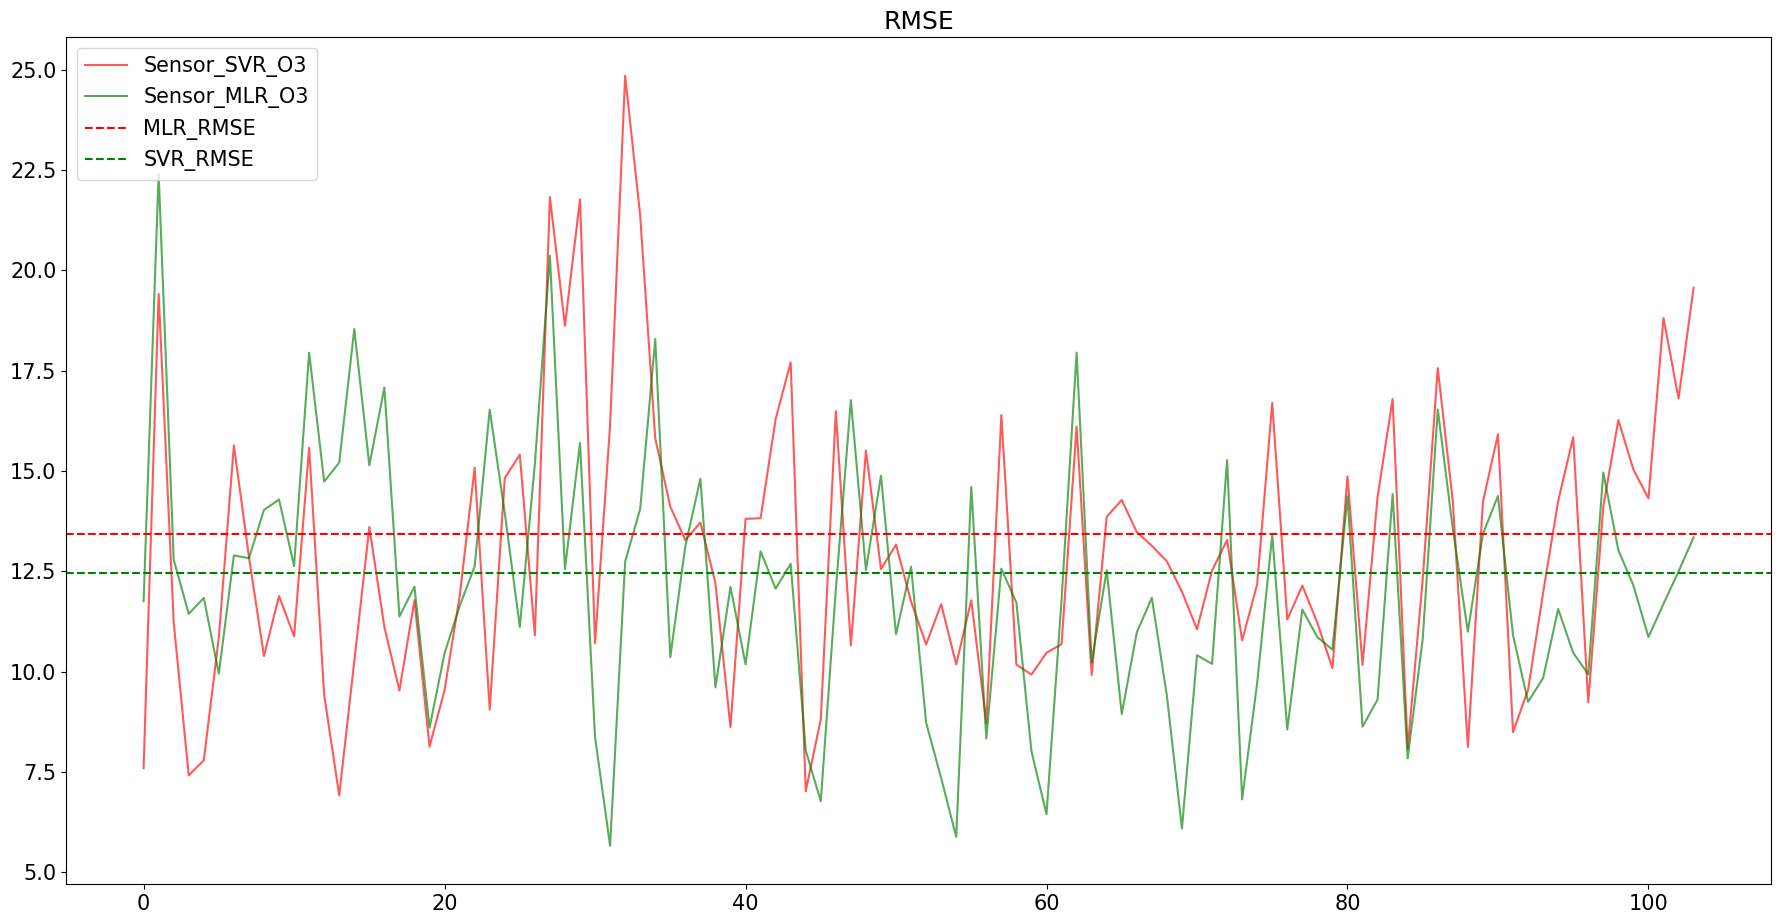

mean_MLR_complete:  13.4240000478119
mean_SVR_complete:  12.454532376719586


In [10]:
#compute the RMSE for the complete days
RMSE_MLR_complete = []
RMSE_SVR_complete = []

for day, group in completeDays:
    RMSE_MLR_complete.append(np.sqrt(mean_squared_error(group['RefSt'], group['Sensor_MLR_O3'])))
    RMSE_SVR_complete.append(np.sqrt(mean_squared_error(group['RefSt'], group['Sensor_SVR_O3'])))
#plot the RMSE
plt.plot(RMSE_MLR_complete, color='red',alpha=0.65)
plt.plot(RMSE_SVR_complete,  color='green',alpha=0.65)
plt.title('RMSE')
data_RefSt_matrix_for_RMSE = dfToMatrix('RefSt')
data_SVR_matrix_for_RMSE = dfToMatrix('Sensor_SVR_O3')
data_MLR_matrix_for_RMSE = dfToMatrix('Sensor_MLR_O3')
#calculate the mean of RMSE
mean_MLR_complete = np.sqrt(mean_squared_error(data_RefSt_matrix_for_RMSE,data_MLR_matrix_for_RMSE))
mean_SVR_complete = np.sqrt(mean_squared_error(data_RefSt_matrix_for_RMSE,data_SVR_matrix_for_RMSE))

# Display the mean on the plot
plt.axhline(mean_MLR_complete, color='red', linestyle='dashed')
plt.axhline(mean_SVR_complete, color='green', linestyle='dashed')
#set the dimensions of the figure
plt.gcf().set_size_inches(22, 11)
plt.legend(['Sensor_SVR_O3', 'Sensor_MLR_O3','MLR_RMSE','SVR_RMSE'], loc='upper left')

plt.show()

print('mean_MLR_complete: ', mean_MLR_complete)
print('mean_SVR_complete: ', mean_SVR_complete)



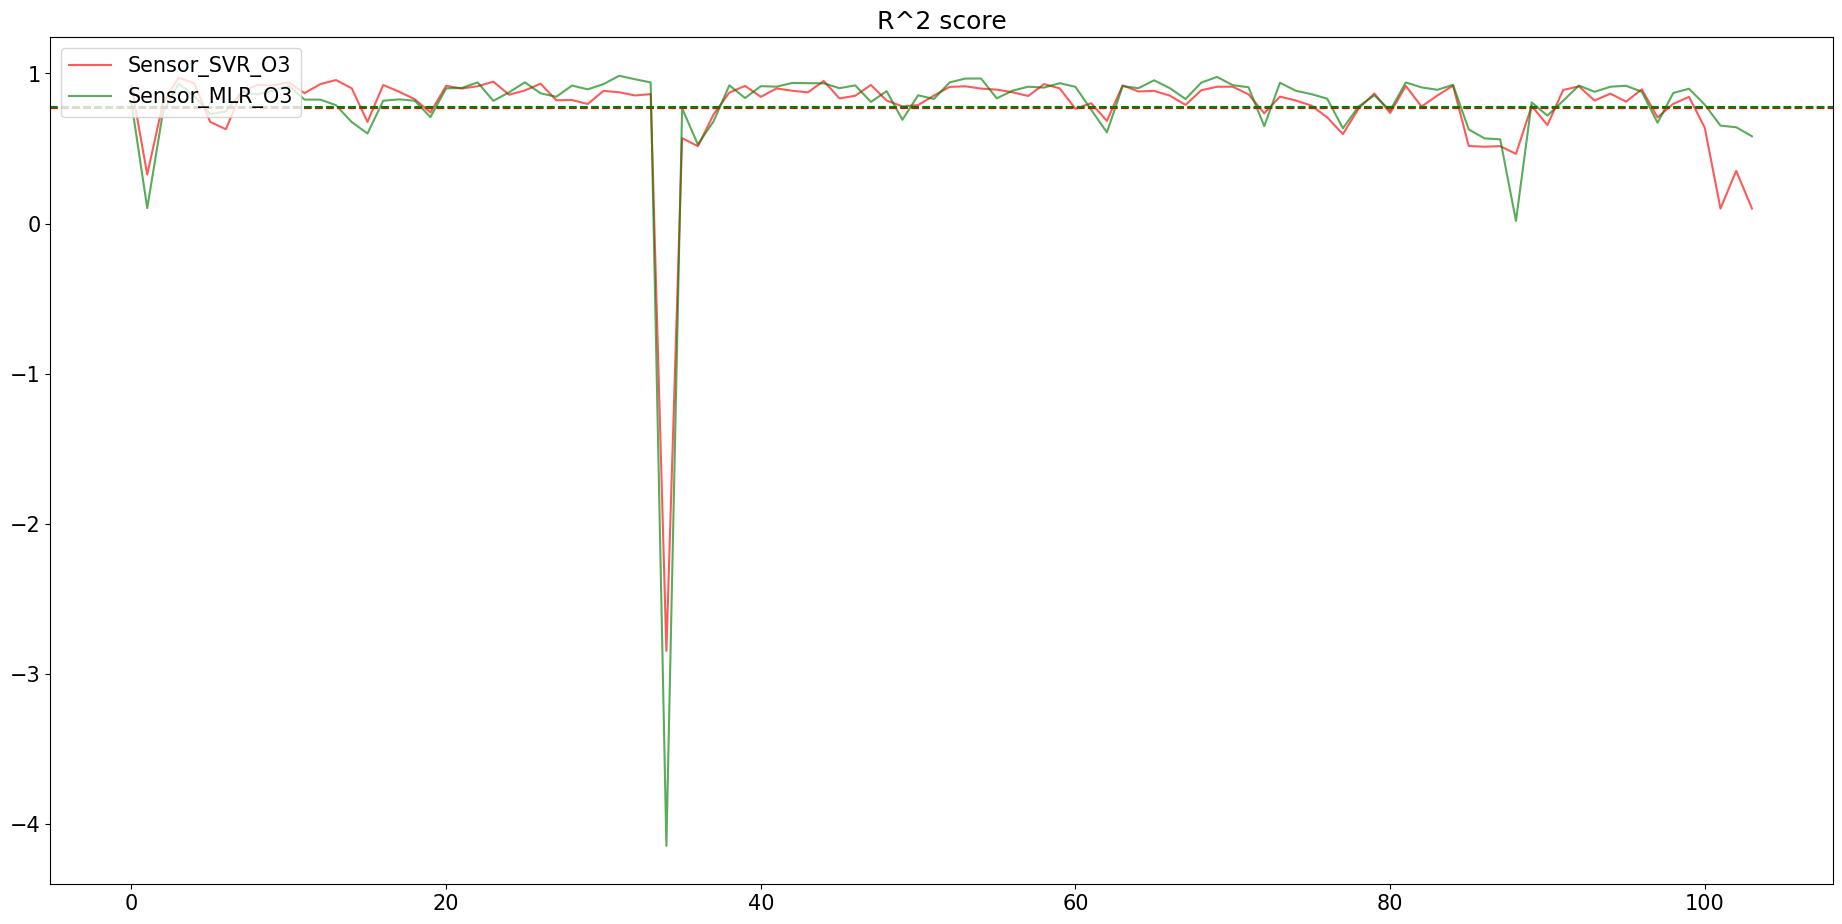

mean_r2_MLR_complete:  0.7671880405104325
mean_r2_SVR_complete:  0.7753246718221569


In [11]:
#compute the R2 for the complete days
r2_MLR_complete = []
r2_SVR_complete = []

for day, group in completeDays:
    r2_MLR_complete.append(r2_score(group['RefSt'], group['Sensor_MLR_O3'],force_finite=False))
    r2_SVR_complete.append(r2_score(group['RefSt'], group['Sensor_SVR_O3'],force_finite=False))
#plot the R2
plt.plot(r2_MLR_complete, color='red',alpha=0.65)
plt.plot(r2_SVR_complete,  color='green',alpha=0.65)
plt.legend(['Sensor_SVR_O3', 'Sensor_MLR_O3'], loc='upper left')
plt.title('R^2 score')
#calculate the mean of R2
mean_r2_MLR_complete =r2_score(data_RefSt_matrix_for_RMSE,data_MLR_matrix_for_RMSE)
mean_r2_SVR_complete =r2_score(data_RefSt_matrix_for_RMSE,data_SVR_matrix_for_RMSE)
# Display the mean on the plot
plt.axhline(mean_r2_MLR_complete, color='red', linestyle='dashed')
plt.axhline(mean_r2_SVR_complete, color='green', linestyle='dashed')
#set the dimensions of the figure
plt.gcf().set_size_inches(23, 11)
plt.show()

print('mean_r2_MLR_complete: ', mean_r2_MLR_complete)
print('mean_r2_SVR_complete: ', mean_r2_SVR_complete)



In [12]:
mean_RefSt_day = []
completeDays_hours = pd.DataFrame = filtered.groupby(filtered.index.hour)
for hour, group in completeDays_hours:
    mean_RefSt_day.append(np.mean(group['RefSt']))

In [13]:
#defining the function to compute denoising
def dfToMatrix(df):
    matrix = np.zeros(shape=(24,len(completeDays)))
    i =0
    for _, group in completeDays:
        matrix[:,i] = group[df]
        i+=1
    return matrix



def substractMean(matrix):
    matrix_subbed = np.zeros(shape=(24,len(completeDays)))
    for i in range(0,len(completeDays)):
        matrix_subbed[:,i] = matrix[:,i] - mean_RefSt_day
    return matrix_subbed

data_RefSt = dfToMatrix('RefSt')
data_subtr_RefSt = substractMean(data_RefSt)

def denoising(df,k):
    #convert the df to a matrix
    matrix = dfToMatrix(df)
    #compute the matrix of subtrucred data
    subt_matrix = substractMean(matrix)
    #compute the SVD of the matrix
    U, _, _ = np.linalg.svd(data_subtr_RefSt, full_matrices=True)
    #compute the uk matrix
    Uk = U[:,:k]
    #compute the denoised matrix
    denoised_matrix = np.zeros(shape=(24,len(completeDays)))
    for i in range(0,len(completeDays)):
        denoised_matrix[:,i] = mean_RefSt_day + np.dot(Uk, np.dot(Uk.T, subt_matrix[:,i]))
    return denoised_matrix

ref_matrix = dfToMatrix('RefSt')
def calc_RMSE_day(matrix):
    out = []
    for i in range(len(completeDays)):
        out.append(np.sqrt(mean_squared_error(ref_matrix[:,i], matrix[:,i])))
    return out      




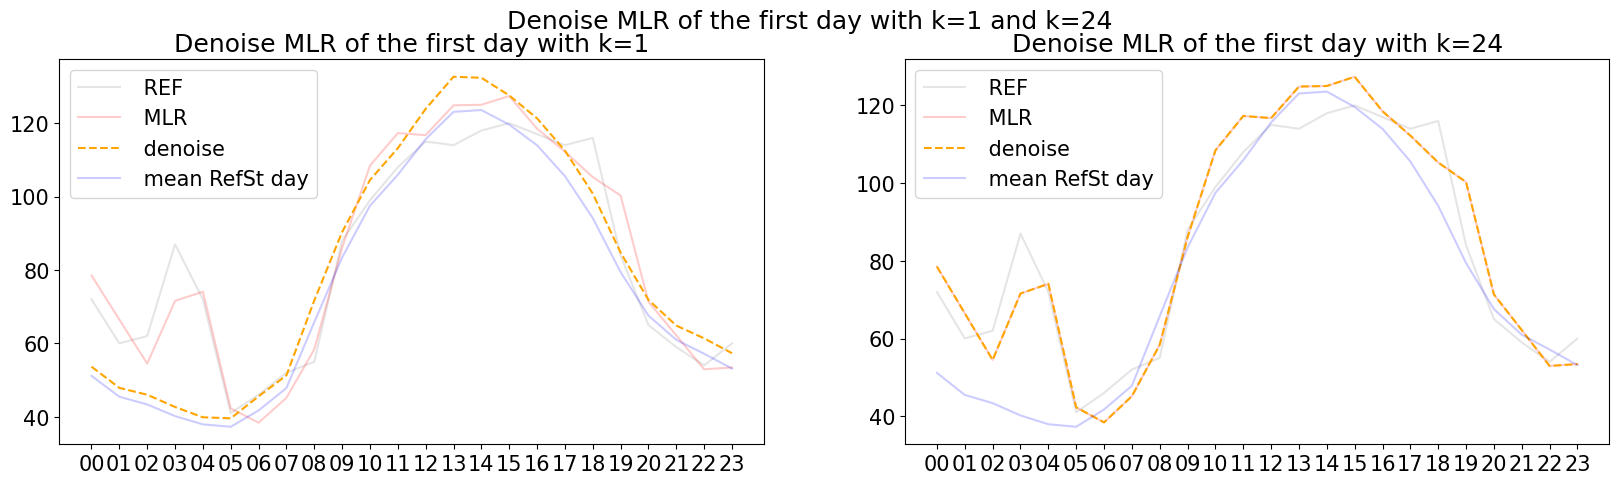

In [14]:
#test to check if the function are follows the Theroy
day = 0
#for each k, calculate the denoise matrix and the RMSE
denoise_MLR = denoising('Sensor_MLR_O3', 1)

#create a subplot of 1 row and 2 columns
fig, axs = plt.subplots(1, 2)
a = 0.2
#plot first day of the denoise matrix
axs[0].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['RefSt'],label=" REF", color='gray',alpha=a)
axs[0].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['Sensor_MLR_O3'],label=" MLR", color='red',alpha=a)
axs[0].plot(denoise_MLR[:,day],label=" denoise", color='orange', linestyle='dashed')
axs[0].plot(mean_RefSt_day,  color='blue', label=" mean RefSt day",alpha=a)
axs[0].legend(loc='upper left')
axs[0].set_title('Denoise MLR of the first day with k=1')

denoise_MLR = denoising('Sensor_MLR_O3', 24)

#plot the RMSE for k = 24
axs[1].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['RefSt'],label=" REF", color='gray',alpha=a)
axs[1].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['Sensor_MLR_O3'],label=" MLR", color='red',alpha=a)
axs[1].plot(denoise_MLR[:,day],label=" denoise", color='orange', linestyle='dashed')
axs[1].plot(mean_RefSt_day,  color='blue', label=" mean RefSt day",alpha=a)
axs[1].legend(loc='upper left')
axs[1].set_title('Denoise MLR of the first day with k=24')

fig.suptitle('Denoise MLR of the first day with k=1 and k=24')
#fig dimensions
fig.set_figheight(5)
fig.set_figwidth(20)
plt.show()
data_MR_matrix = dfToMatrix('Sensor_MLR_O3')






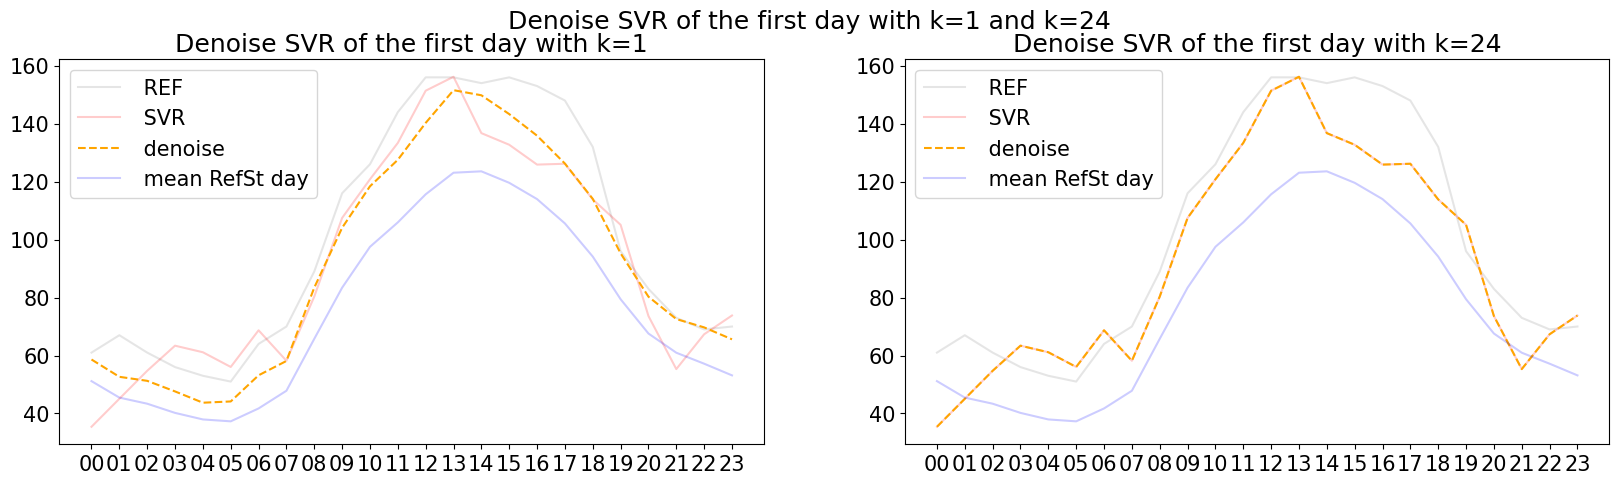

In [15]:
#test to check if the function are follows the Theroy

day = 24
#for each k, calculate the denoise matrix and the RMSE
denoise_SVR = denoising('Sensor_SVR_O3', 1)


#create a subplot of 1 row and 2 columns
fig, axs = plt.subplots(1, 2)
a = 0.2
#plot first day of the denoise matrix
axs[0].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['RefSt'],label=" REF", color='gray',alpha=a)
axs[0].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['Sensor_SVR_O3'],label=" SVR", color='red',alpha=a)
axs[0].plot(denoise_SVR[:,day],label=" denoise", color='orange', linestyle='dashed')
axs[0].plot(mean_RefSt_day,  color='blue', label=" mean RefSt day",alpha=a)
axs[0].legend(loc='upper left')
axs[0].set_title('Denoise SVR of the first day with k=1')


denoise_SVR = denoising('Sensor_SVR_O3', 24)


#plot the RMSE for k = 24
axs[1].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['RefSt'],label=" REF", color='gray',alpha=a)
axs[1].plot(completeDays.get_group(list(completeDays.groups.keys())[day]).index.strftime('%H'),completeDays.get_group(list(completeDays.groups.keys())[day])['Sensor_SVR_O3'],label=" SVR", color='red',alpha=a)
axs[1].plot(denoise_SVR[:,day],label=" denoise", color='orange', linestyle='dashed')
axs[1].plot(mean_RefSt_day,  color='blue', label=" mean RefSt day",alpha=a)
axs[1].legend(loc='upper left')
axs[1].set_title('Denoise SVR of the first day with k=24')

fig.suptitle('Denoise SVR of the first day with k=1 and k=24')

plt.gcf().set_size_inches(20, 5)

plt.show()





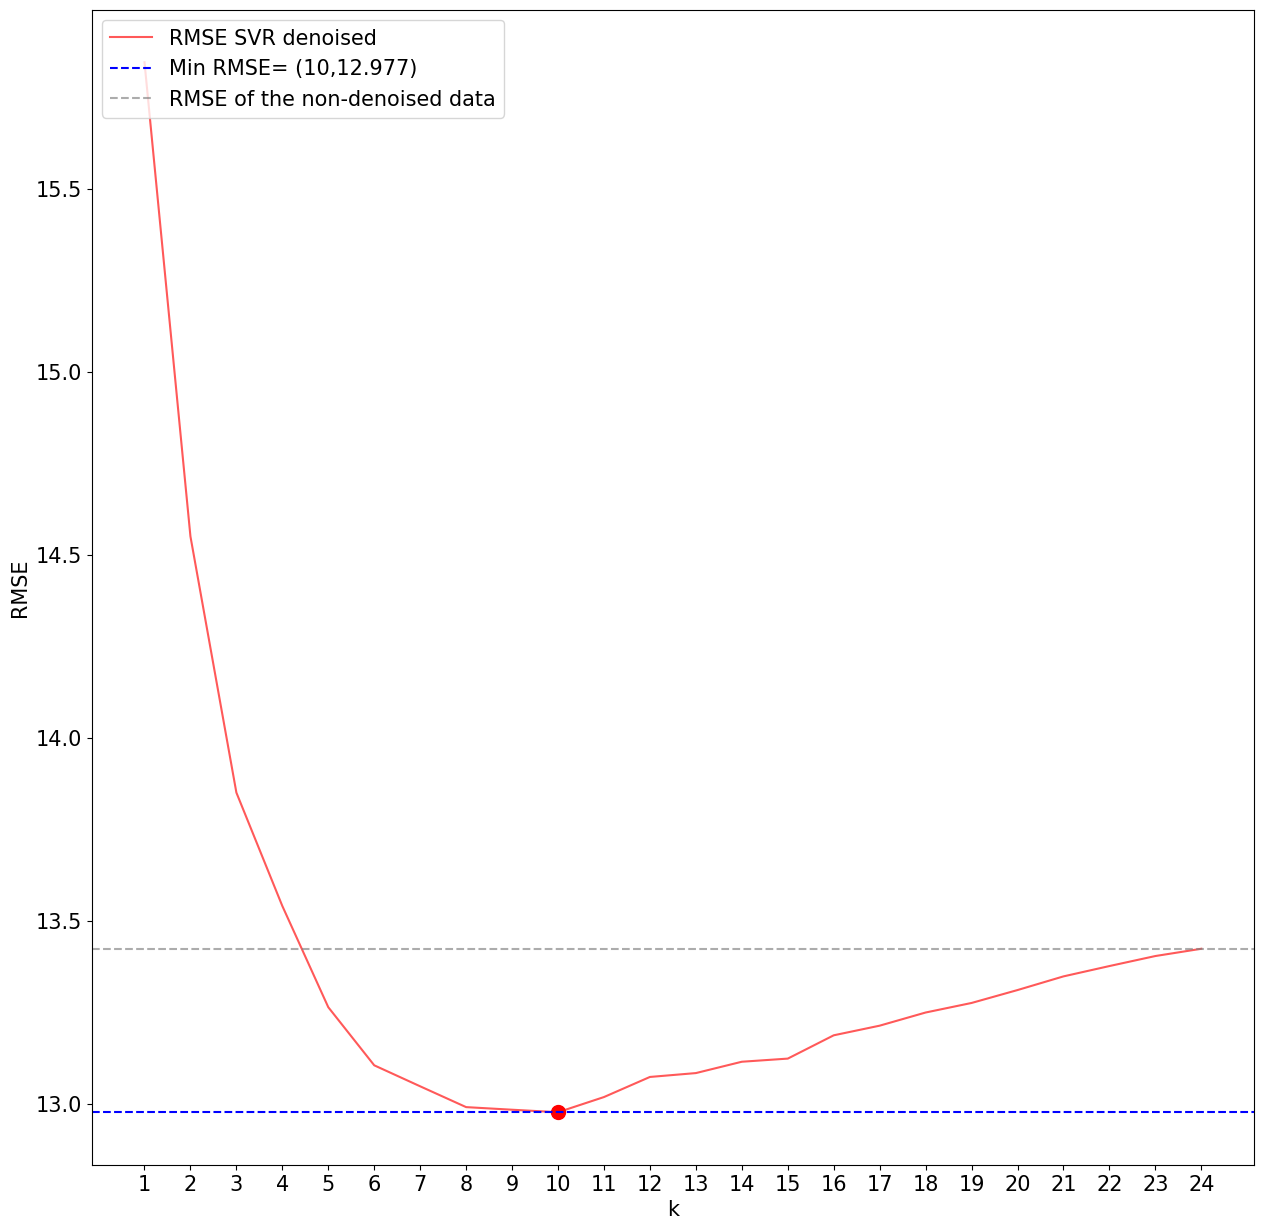

In [16]:
#calculate the RMSE for each day, and the mean of the RMSE
RMSE_MLR_denoise_valeues = []
data_RefSt_matrix_for_RMSE = dfToMatrix('RefSt')
#transform the matrix in a list
data_RefSt_matrix_for_RMSE = data_RefSt_matrix_for_RMSE.flatten()


#for each k calc the mean of the RMSE
for k in range(1,25):
    denoise_MLR = denoising('Sensor_MLR_O3', k)
    #calc the mean of the RMSE for each day append it to the list
    denoise_MLR = denoise_MLR.flatten()
    RMSE_MLR_denoise_valeues.append(mean_squared_error(data_RefSt_matrix_for_RMSE,denoise_MLR, squared=False))

#plot the mean of the RMSE for each k
#plot th

plt.plot(range(1,len(RMSE_MLR_denoise_valeues)+1),RMSE_MLR_denoise_valeues, color='red',alpha=0.65)
# show in the plto the lowest RMSE
plt.axhline(np.min(RMSE_MLR_denoise_valeues), color='blue', linestyle='dashed')
#plot the RMSE of the fifth k
plt.axhline(mean_MLR_complete,alpha=0.65, color='gray', linestyle='dashed')

#get the index of the min RMSE
index_min = np.argmin(RMSE_MLR_denoise_valeues)+1


pointMin = '('+str(np.argmin(RMSE_MLR_denoise_valeues)+1)+','+str(round(np.min(RMSE_MLR_denoise_valeues),3))+')'
pointMin_MLR = [np.argmin(RMSE_MLR_denoise_valeues)+1,np.min(RMSE_MLR_denoise_valeues)]

#plot the RMSE obtained in the beginning
plt.legend(['RMSE SVR denoised', 'Min RMSE= '+pointMin,"RMSE of the non-denoised data"], loc='upper left')
#make the point of the min RMSE circulated
plt.scatter(index_min, np.min(RMSE_MLR_denoise_valeues), color='red', s=100)
plt.xticks(np.arange(1,25,1))
#set the dimensions of the figure
plt.gcf().set_size_inches(15, 15)
#add label to x and y axis
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()


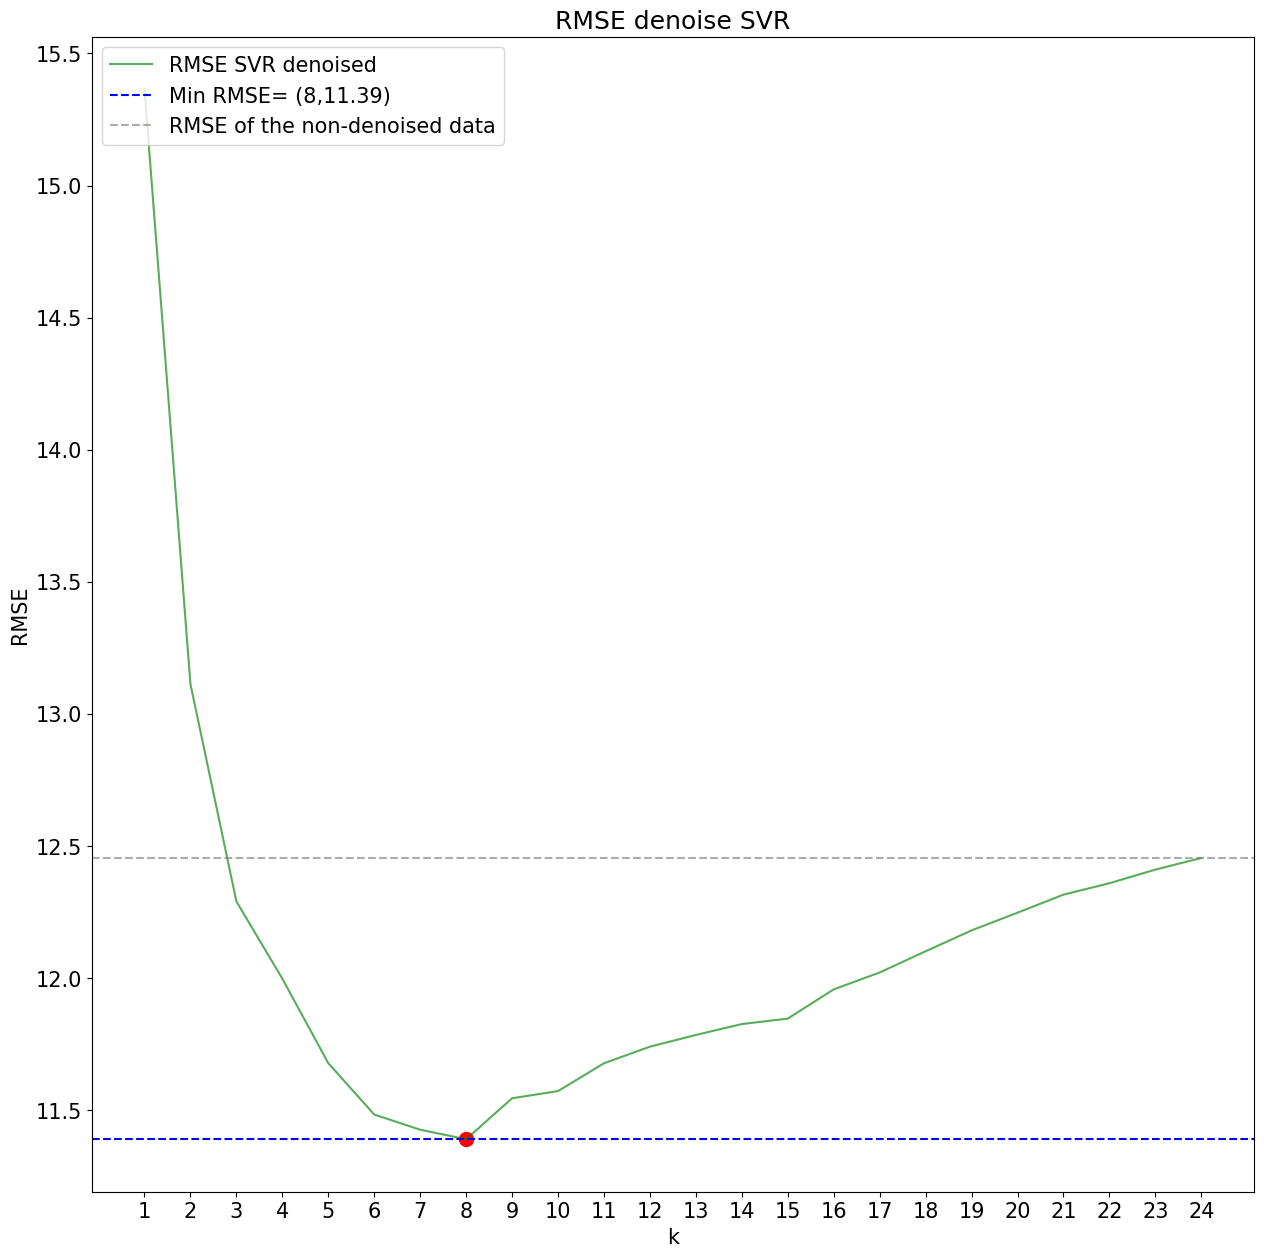

In [17]:
#calculate the RMSE for each day, and the mean of the RMSE
RMSE_SVR_denoise_mean = []
data_RefSt_matrix_for_RMSE = dfToMatrix('RefSt')
#for each k calc the mean of the RMSE
for k in range(1,25):
    denoise_SVR = denoising('Sensor_SVR_O3', k)
    #calc the mean of the RMSE for each day append it to the list
    RMSE_SVR_denoise_mean.append(mean_squared_error(data_RefSt_matrix_for_RMSE.flatten(),denoise_SVR.flatten(), squared=False))

#plot the mean of the RMSE for each k
plt.title('RMSE denoise SVR')
plt.plot(range(1,len(RMSE_MLR_denoise_valeues)+1),RMSE_SVR_denoise_mean, color='green',alpha=0.65)
# show in the plto the lowest RMSE
plt.axhline(np.min(RMSE_SVR_denoise_mean), color='blue', linestyle='dashed')
#plot the RMSE of the fifth k
plt.axhline(mean_SVR_complete,alpha=0.65, color='gray', linestyle='dashed')

#get the index of the min RMSE
index_min = np.argmin(RMSE_SVR_denoise_mean)+1

pointMin = '('+str(index_min)+','+str(round(np.min(RMSE_SVR_denoise_mean),3))+')'
pointMin_SVR = [np.argmin(RMSE_SVR_denoise_mean)+1,np.min(RMSE_SVR_denoise_mean)]

#plot the RMSE obtained in the beginning
plt.legend(['RMSE SVR denoised', 'Min RMSE= '+pointMin,"RMSE of the non-denoised data"], loc='upper left')
#make the point of the min RMSE circulated
plt.scatter(index_min, np.min(RMSE_SVR_denoise_mean), color='red', s=100)
plt.xticks(np.arange(1,25,1))

#set the dimensions of the figure
plt.gcf().set_size_inches(15, 15)
#add label to x and y axis
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()


In [18]:
#compute Gavish hard thresholding fot the MLR and SVR
def GavishHardThresholding(df):
    #convert the df to a matrix
    matrix = dfToMatrix(df)
    #compute the matrix of subtrucred data
    subt_matrix = substractMean(matrix)
    #compute the SVD of the matrix
    U, s, VT = np.linalg.svd(subt_matrix, full_matrices=True)
    #compute the uk matrix
    b = subt_matrix.shape[0]/data_RefSt.shape[1]
    w = 0.56*b**3 - 0.95*b**2 + 1.82*b + 1.43
    median = np.median(s)
    #compute the denoised matrix
    singThreshold = w*median
    r=0
    for i in range(len(s)):
        if s[i] > singThreshold:
            r += 1
    return r,singThreshold

#compute the Gavish hard thresholding for the MLR
r_MLR,singThreshold_MLR = GavishHardThresholding('Sensor_MLR_O3')
#compute the Gavish hard thresholding for the SVR
r_SVR,singThreshold_SVR = GavishHardThresholding('Sensor_SVR_O3')

print('r_MLR: ', r_MLR, 'singThreshold_MLR: ', singThreshold_MLR)
print('r_SVR: ', r_SVR, 'singThreshold_SVR: ', singThreshold_SVR)




r_MLR:  7 singThreshold_MLR:  114.14154284312676
r_SVR:  7 singThreshold_SVR:  143.33140267497117


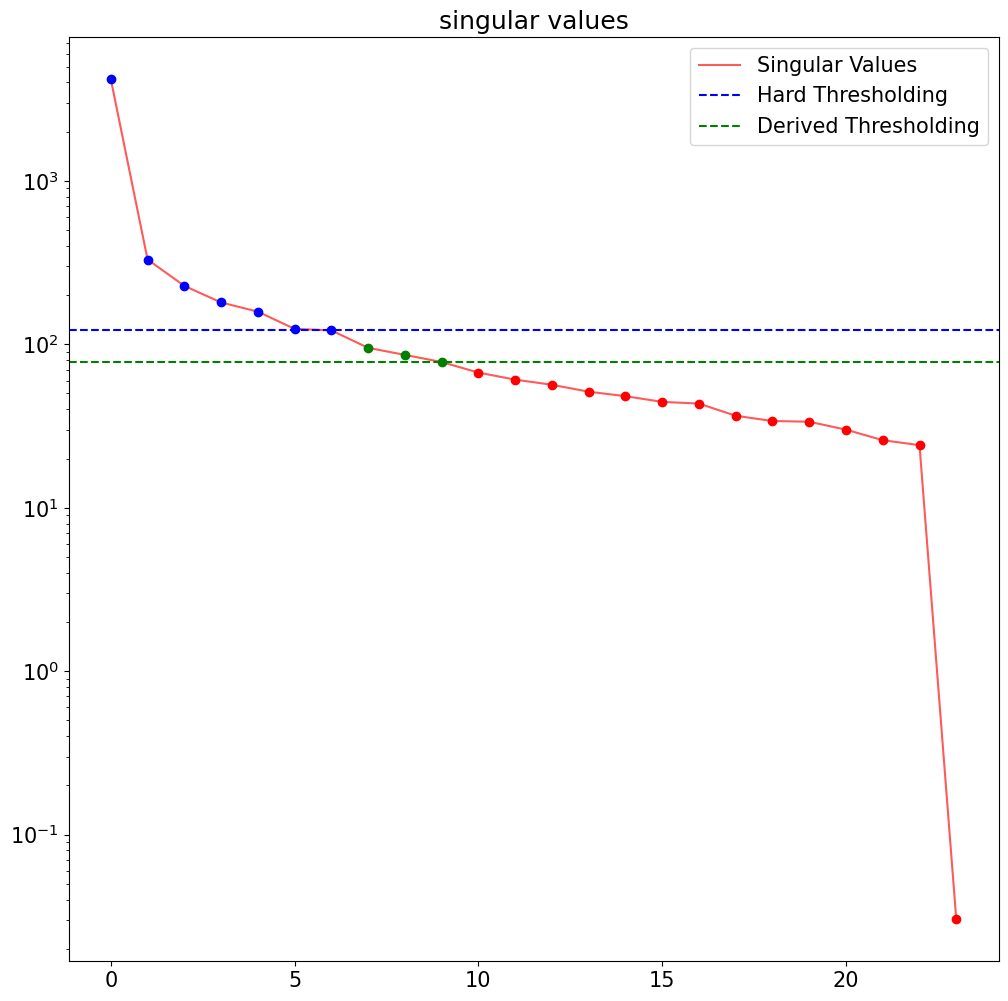

In [19]:
#calculate the singual values fo the MLR data
data_MLR = dfToMatrix('Sensor_MLR_O3')
U_MLR, s_MLR, VT_MLR = np.linalg.svd(data_MLR, full_matrices=True)

#draw a curve with the singular values in log scale
plt.plot(s_MLR, color='red',alpha=0.65, label='Singular Values')
# each point circled if it is greater than the singThreshold
flag1, flag2 = True, True
for i in range(len(s_MLR)):
    if i < r_MLR:
        plt.plot(i,s_MLR[i],marker='o', color='blue')
# each point circled if it is lower than the singThreshold
    elif i < pointMin_MLR[0]:
        if(flag2):
            plt.axhline(s_MLR[i-1], color='blue', linestyle='dashed', label='Hard Thresholding')
            flag2 = False
        plt.plot(i,s_MLR[i],marker='o', color='green')
    else:
        if(flag1):
            plt.axhline(s_MLR[i-1], color='green', linestyle='dashed', label='Derived Thresholding')
            flag1 = False
        plt.plot(i,s_MLR[i],marker='o', color='red')
        
#plot the singThreshold
#set the dimensions of the figure
plt.gcf().set_size_inches(12, 12)
plt.yscale('log')

#add legend
plt.legend(loc='upper right')
plt.title('singular values')
plt.show()

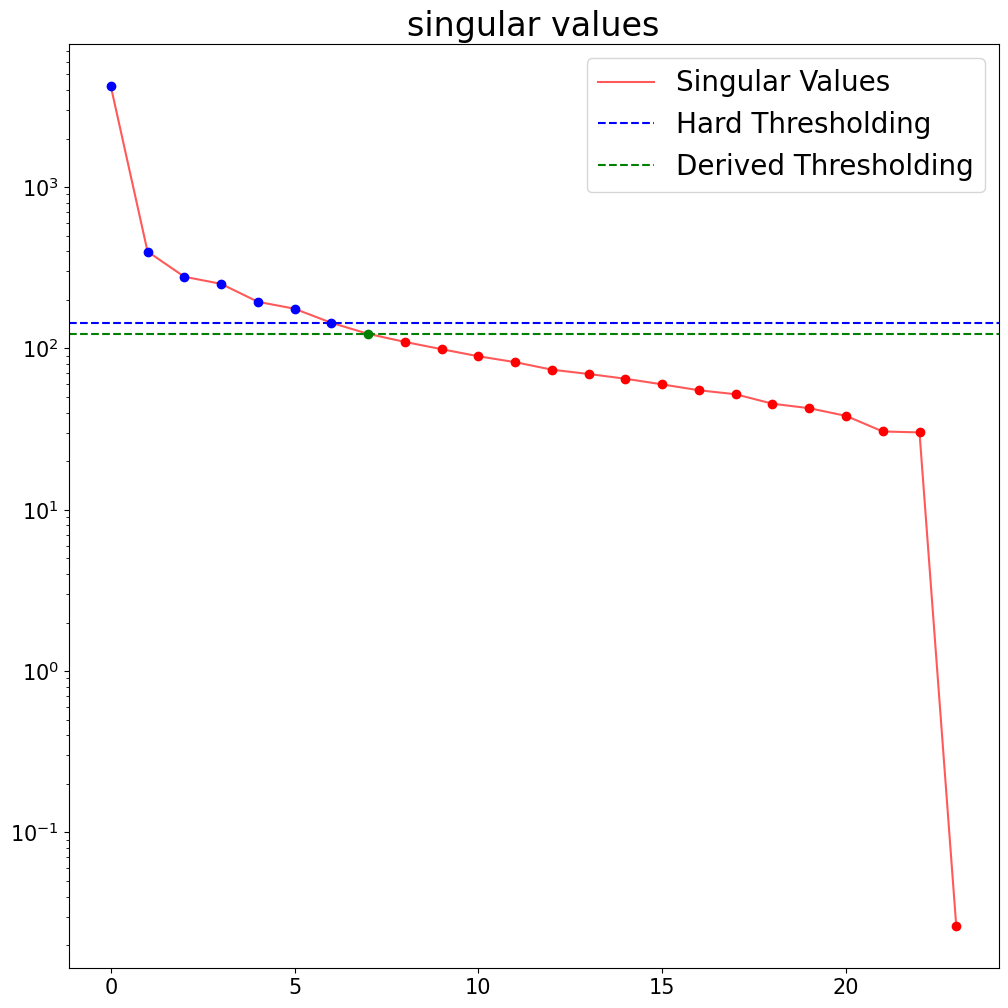

In [20]:
#calculate the singual values fo the SVR data
data_SVR = dfToMatrix('Sensor_SVR_O3')
U_SVR, s_SVR, VT_SVR = np.linalg.svd(data_SVR, full_matrices=True)

#draw a curve with the singular values in log scale
plt.plot(s_SVR, color='red',alpha=0.65, label='Singular Values')
# each point circled if it is greater than the singThreshold
flag1, flag2 = True, True
for i in range(len(s_SVR)):
    if i < r_SVR:
        plt.plot(i,s_SVR[i],marker='o', color='blue')
# each point circled if it is lower than the singThreshold

    elif i < pointMin_SVR[0]:
        if(flag2):
            plt.axhline(s_SVR[i-1], color='blue', linestyle='dashed', label='Hard Thresholding')
            flag2 = False
        plt.plot(i,s_SVR[i],marker='o', color='green')
    else:
        if(flag1):
            plt.axhline(s_SVR[i-1], color='green', linestyle='dashed', label='Derived Thresholding')
            flag1 = False
        plt.plot(i,s_SVR[i],marker='o', color='red')

#set the dimensions of the figure
plt.gcf().set_size_inches(12, 12)
plt.yscale('log')
#dimension of the font
plt.rcParams.update({'font.size': 20})
#add legend
plt.legend(loc='upper right')
plt.title('singular values')
plt.show()


In [21]:

def denoising_different_svd(df,k,df_svd):
    #convert the df to a matrix
    matrix = dfToMatrix(df)
    #compute the matrix of subtrucred data
    subt_matrix = substractMean(matrix)
    #compute the SVD of the matrix
    matrix_svd = dfToMatrix(df_svd)
    matrix_svd_subt = substractMean(matrix_svd)
    U, _, _ = np.linalg.svd(matrix_svd_subt, full_matrices=True)
    #compute the uk matrix
    Uk = U[:,:k]
    #compute the denoised matrix
    denoised_matrix = np.zeros(shape=(24,len(completeDays)))
    for i in range(0,len(completeDays)):
        denoised_matrix[:,i] = mean_RefSt_day + np.dot(Uk, np.dot(Uk.T, subt_matrix[:,i]))
    return denoised_matrix



In [22]:
#calculate the RMSE for the r_MLR and r_SVR
denoise_MLR_Gavish = denoising_different_svd('Sensor_MLR_O3', 7, 'Sensor_MLR_O3').flatten()
denoise_SVR_Gavish = denoising_different_svd('Sensor_SVR_O3', 7, 'Sensor_SVR_O3').flatten()
data_RefSt_matrix_for_RMSE = dfToMatrix('RefSt').flatten()
#calculate the RMSE for the r_MLR and r_SVR
RMSE_MLR_Gavish = mean_squared_error(data_RefSt_matrix_for_RMSE,denoise_MLR_Gavish, squared=False)
RMSE_SVR_Gavish = mean_squared_error(data_RefSt_matrix_for_RMSE,denoise_SVR_Gavish, squared=False)

print('RMSE_MLR_Gavish: ', RMSE_MLR_Gavish)
print('RMSE_SVR_Gavish: ', RMSE_SVR_Gavish)




RMSE_MLR_Gavish:  13.481203779550006
RMSE_SVR_Gavish:  11.94985783117375


In [23]:
mean_RefSt_day = []
mean_MLR_complete = []
mean_SVR_complete = []
completeDays_hours = pd.DataFrame = filtered.groupby(filtered.index.hour)
for hour, group in completeDays_hours:
    mean_RefSt_day.append(np.mean(group['RefSt']))
    mean_MLR_complete.append(np.mean(group['Sensor_MLR_O3']))
    mean_SVR_complete.append(np.mean(group['Sensor_SVR_O3']))

def getmean(df):
    if df == 'RefSt':
        return mean_RefSt_day
    elif df == 'Sensor_MLR_O3':
        return mean_MLR_complete
    elif df == 'Sensor_SVR_O3':
        return mean_SVR_complete

def substractMean(matrix, sub):
    matrix_subbed = np.zeros(shape=(24,len(completeDays)))
    if sub == 'RefSt':
        for i in range(0,len(completeDays)):
            matrix_subbed[:,i] = matrix[:,i] - mean_RefSt_day
    elif sub == 'Sensor_MLR_O3':
        for i in range(0,len(completeDays)):
            matrix_subbed[:,i] = matrix[:,i] - mean_MLR_complete
    elif sub == 'Sensor_SVR_O3':
        for i in range(0,len(completeDays)):
            matrix_subbed[:,i] = matrix[:,i] - mean_SVR_complete

    return matrix_subbed

def denoising_different_svd(df,k,df_svd):
    #convert the df to a matrix
    matrix = dfToMatrix(df)
    #compute the matrix of subtrucred data
    subt_matrix = substractMean(matrix,df_svd)
    #compute the SVD of the matrix
    matrix_svd = dfToMatrix(df_svd)
    matrix_svd_subt = substractMean(matrix_svd,df_svd)
    U, _, _ = np.linalg.svd(matrix_svd_subt, full_matrices=True)
    #compute the uk matrix
    Uk = U[:,:k]
    #compute the denoised matrix
    denoised_matrix = np.zeros(shape=(24,len(completeDays)))
    for i in range(0,len(completeDays)):
        denoised_matrix[:,i] = getmean(df_svd) + np.dot(Uk, np.dot(Uk.T, subt_matrix[:,i]))
    return denoised_matrix


In [24]:
#calculate the RMSE for the r_MLR and r_SVR
denoise_MLR_Gavish = denoising_different_svd('Sensor_MLR_O3', r_MLR, 'Sensor_MLR_O3').flatten()
denoise_SVR_Gavish = denoising_different_svd('Sensor_SVR_O3', r_SVR, 'Sensor_SVR_O3').flatten()
data_RefSt_matrix_for_RMSE = dfToMatrix('RefSt').flatten()
#calculate the RMSE for the r_MLR and r_SVR
RMSE_MLR_Gavish = mean_squared_error(data_RefSt_matrix_for_RMSE,denoise_MLR_Gavish, squared=False)
RMSE_SVR_Gavish = mean_squared_error(data_RefSt_matrix_for_RMSE,denoise_SVR_Gavish, squared=False)

print('RMSE_MLR_Gavish: ', RMSE_MLR_Gavish)
print('RMSE_SVR_Gavish: ', RMSE_SVR_Gavish)



RMSE_MLR_Gavish:  13.463673283403239
RMSE_SVR_Gavish:  11.955568554203802
